In [34]:
#initialise a grid of 10 by 10 points of 2d coordinates
#each point is a tuple of two integers


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]


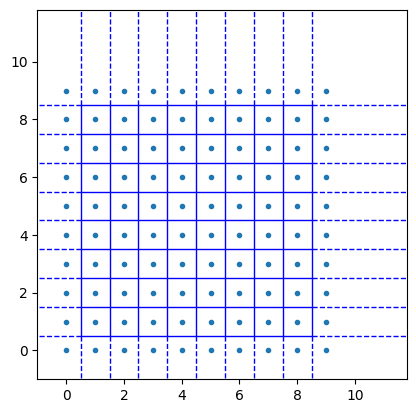

In [35]:
import ForwardPassUtils as fpu
import torch
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, cKDTree
points = [(x, y) for x in range(10) for y in range(10)]
voronoi_initial = Voronoi(points)
minX, maxX, minY, maxY = fpu.computeMinMax(voronoi_initial)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')
plt.xlim(minX-1, maxX+1)
plt.ylim(minY-1, maxY+1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [36]:
rx = 0
ry = 0
#1 d = px-rx
#2 d = py-ry
#3 d = sqrt((px-rx)^2 + (py-ry)^2)
#d=sqrt((max(px-rx,0)^2 + max(py-ry,0)^2)
#d=len(max(abs(P)-R,0)) | P = (px, py), R = (rx, ry) #outside
#q=abs(p)-R 
#d=len(max(q,0))+min(maxcomp(q),0)

In [37]:
def box_sdf(p, r):
    d = abs(p) - r
    print(d)
    return len(max(d, 0)) + min(max(d[0],d[1]), 0)

In [38]:
point = torch.tensor([2.0, 2.0])
r = torch.tensor([2.0, 1.0])
print(box_sdf(point, r))

tensor([0., 1.])


RuntimeError: Boolean value of Tensor with more than one value is ambiguous

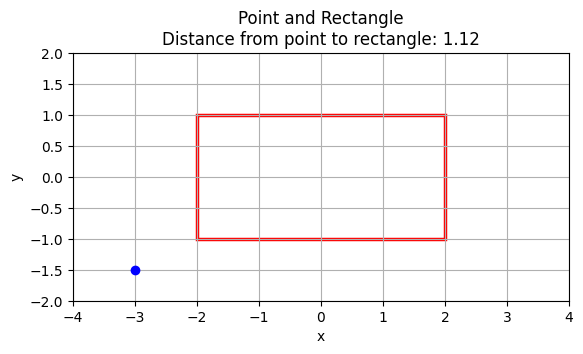

In [ ]:
import numpy as np

def sdBox(p, b):
    d = np.abs(p) - b
    return np.linalg.norm(np.maximum(d, 0)) + min(max(d[0], d[1]), 0)

# Example usage
p = [-3,-1.5]
b = [2.0, 1.0]
distance = sdBox(p, b)

# Create a rectangle centered at origin with dimensions 2*b
rectangle = plt.Rectangle((-b[0], -b[1]), 2*b[0], 2*b[1], edgecolor='red', facecolor='none', linewidth=2.5)

# Plotting
fig, ax = plt.subplots()
ax.add_patch(rectangle)
ax.plot(p[0], p[1], 'bo')  # plot the point
ax.set_xlim(-2*b[0], 2*b[0])
ax.set_ylim(-2*b[1], 2*b[1])
ax.set_aspect('equal', adjustable='box')

plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Point and Rectangle\nDistance from point to rectangle: {distance:.2f}")
plt.grid(True)
plt.show()